In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

# Hourly Temperature Line Chart

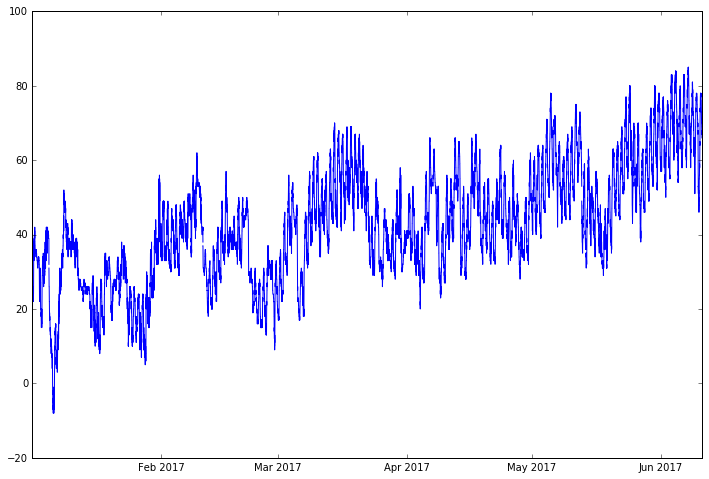

In [7]:
df = pd.read_csv('NV_19062017_WBAN_53138.csv')
                                                                
df['DATE'] = df['DATE'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M'))
df['PUREDATE'] = df['DATE'].map(lambda x : x.date())

x = df['DATE']
y = df['HOURLYDRYBULBTEMPF']

plt.plot(x,y)

# Daily Sunrise Line Chart


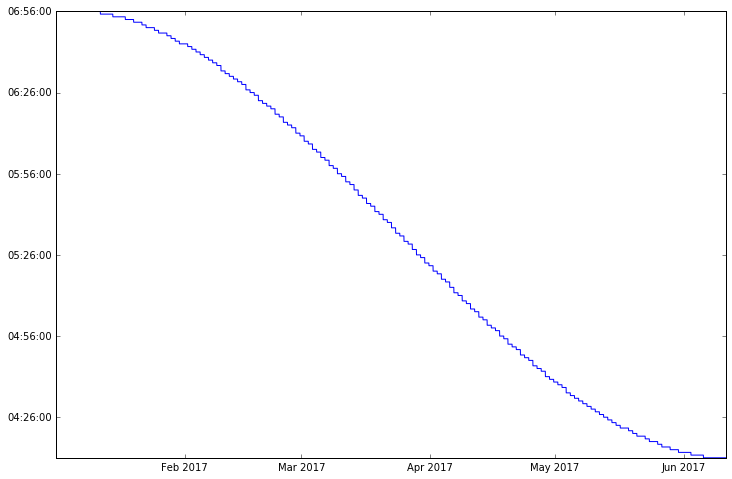

In [8]:
df['DAILYSunrise'] = df['DAILYSunrise'].map(lambda x: datetime.strptime(str(x), '%H%M'))

x = df['DATE']
y = df['DAILYSunrise']

plt.plot(x,y)

# Daily Sunset Line Chart


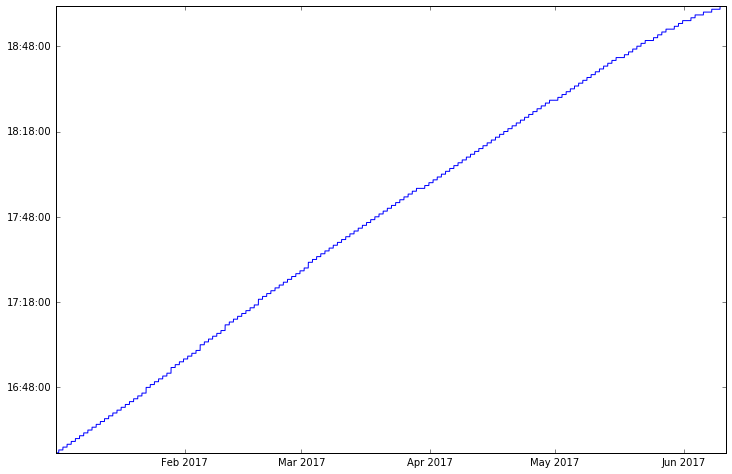

In [9]:
df['DAILYSunset'] = df['DAILYSunset'].map(lambda x: datetime.strptime(str(x), '%H%M'))

x = df['DATE']
y = df['DAILYSunset']

plt.plot(x,y)

# Sunrise and Sunset time Relationship

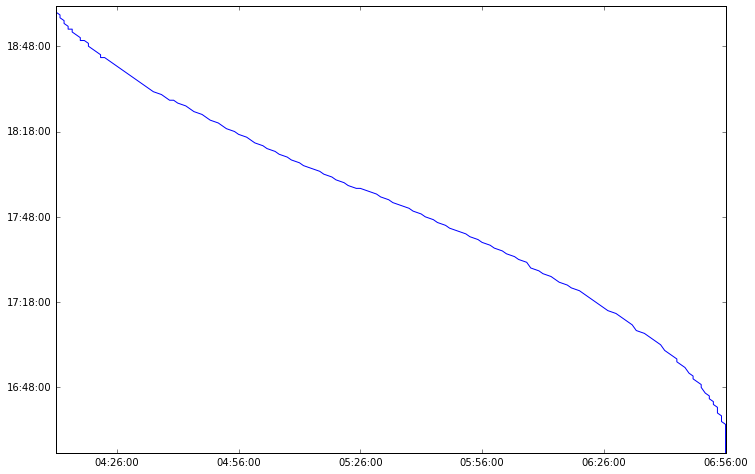

In [10]:
x = df['DAILYSunrise']
y = df['DAILYSunset']

plt.plot(x,y)

# Hourly Wind Speed Box Plot


{'boxes': [<matplotlib.lines.Line2D at 0x7fad9c663630>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad9c65bf98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fad9c1371d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fad9c6549e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fad9c663ef0>,
  <matplotlib.lines.Line2D at 0x7fad9ae10da0>]}

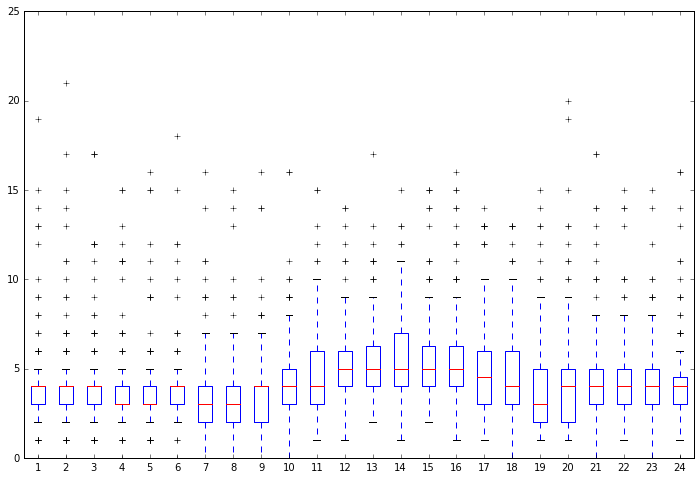

In [14]:
windSpeedDf = df[df['HOURLYWindSpeed'] == df['HOURLYWindSpeed']][['HOURLYWindSpeed', 'DATE']]

windSpeedDf['HOUR'] = windSpeedDf['DATE'].map(lambda x : x.hour)

windSpeed_dict = {}
for index, row in windSpeedDf.iterrows():
    if row['HOUR'] in windSpeed_dict:
        windSpeed_dict[row['HOUR']].append(row['HOURLYWindSpeed'])
    else:
        windSpeed_dict[row['HOUR']] = []

plt.boxplot(list(windSpeed_dict.values()))

# Daily Precipitation Line Chart


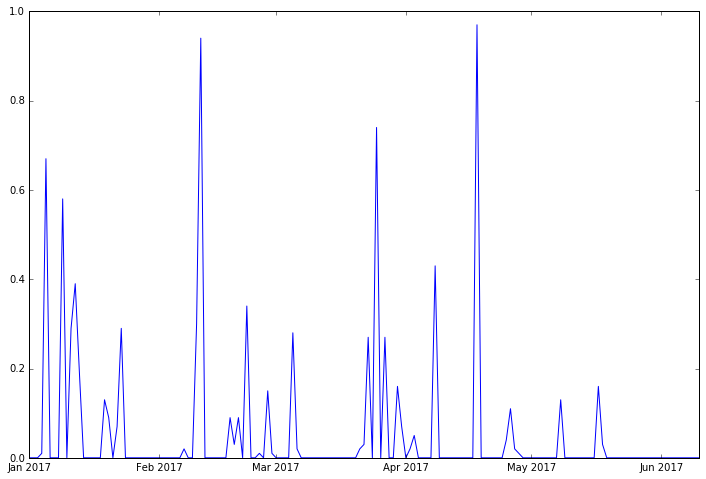

In [12]:
precipDf = df[df['HOURLYPrecip'] == df['HOURLYPrecip']]

newPrecipDf = pd.DataFrame(precipDf.groupby('PUREDATE')['HOURLYPrecip'].mean()).reset_index()

plt.plot(newPrecipDf['PUREDATE'],newPrecipDf['HOURLYPrecip'])

# Average Wind Speed 

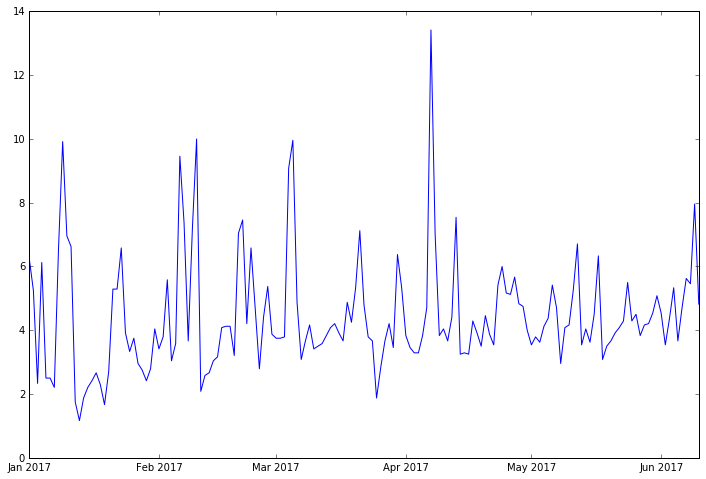

In [15]:
windDf = df[df['HOURLYWindSpeed'] == df['HOURLYWindSpeed']]

newWindSpeedDf = pd.DataFrame(precipDf.groupby('PUREDATE')['HOURLYWindSpeed'].mean()).reset_index()

plt.plot(newWindSpeedDf['PUREDATE'],newWindSpeedDf['HOURLYWindSpeed'])

# HeatingDegreeDays

In [13]:
hddDf = df[df['REPORTTPYE'] == 'SOD'][['DATE', 'DAILYHeatingDegreeDays', 'DAILYCoolingDegreeDays']]
print(hddDf)

                     DATE  DAILYHeatingDegreeDays  DAILYCoolingDegreeDays
287   2017-01-01 23:59:00                      35                       0
576   2017-01-02 23:59:00                      37                       0
865   2017-01-03 23:59:00                      40                       0
1154  2017-01-04 23:59:00                      29                       0
1443  2017-01-05 23:59:00                      53                       0
1732  2017-01-06 23:59:00                      61                       0
2021  2017-01-07 23:59:00                      48                       0
2310  2017-01-08 23:59:00                      25                       0
2599  2017-01-09 23:59:00                      25                       0
2888  2017-01-10 23:59:00                      25                       0
3177  2017-01-11 23:59:00                      31                       0
3466  2017-01-12 23:59:00                      37                       0
3755  2017-01-13 23:59:00             